In [1]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("retail_sales_superstore.csv")

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          500 non-null    object 
 1   Order_Date        500 non-null    object 
 2   Customer_Segment  500 non-null    object 
 3   Category          500 non-null    object 
 4   Sub_Category      500 non-null    object 
 5   Region            500 non-null    object 
 6   Sales             500 non-null    float64
 7   Discount          500 non-null    float64
 8   Profit            500 non-null    float64
dtypes: float64(3), object(6)
memory usage: 35.3+ KB


In [7]:
df = df[['Sales', 'Profit', 'Discount']]

In [8]:
df

,Sales,Profit,Discount
0,4608.20,-460.82,0.30
1,3102.42,465.36,0.05
2,3992.86,-39.93,0.21
3,2433.54,267.69,0.09
4,630.68,126.14,0.00
...,...,...,...
495,104.60,-20.92,0.40
496,2109.96,-295.39,0.34
497,2432.65,-24.33,0.21
498,145.00,24.65,0.03


In [9]:
df.isnull().sum() #Check missing values

Sales       0
Profit      0
Discount    0
dtype: int64

In [10]:
df = df.dropna()  #If any nulls

In [11]:
def discount_level(discount):
    if discount <= 0.10:
        return "Low"
    elif discount <= 0.25:
        return "Medium"
    else:
        return "High"

df['Discount_Level'] = df['Discount'].apply(discount_level)

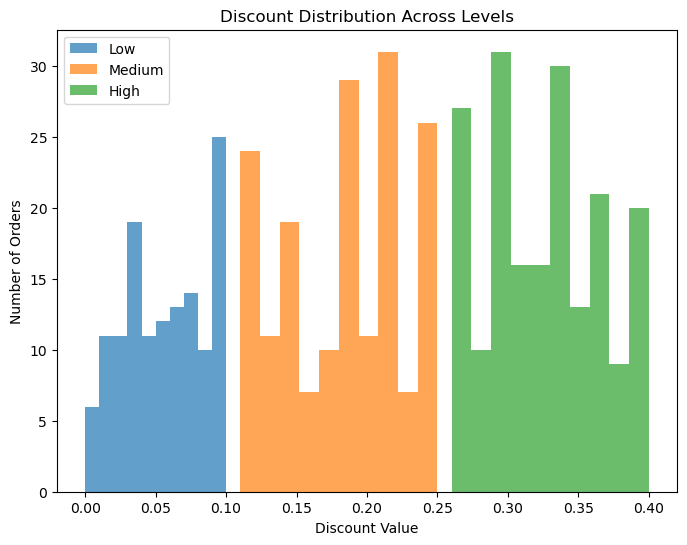

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.hist(df[df['Discount_Level'] == 'Low']['Discount'],
         bins=10, alpha=0.7, label='Low')

plt.hist(df[df['Discount_Level'] == 'Medium']['Discount'],
         bins=10, alpha=0.7, label='Medium')

plt.hist(df[df['Discount_Level'] == 'High']['Discount'],
         bins=10, alpha=0.7, label='High')

plt.xlabel("Discount Value")
plt.ylabel("Number of Orders")
plt.title("Discount Distribution Across Levels")
plt.legend()
plt.show()

In [12]:
df

,Sales,Profit,Discount,Discount_Level
0,4608.20,-460.82,0.30,High
1,3102.42,465.36,0.05,Low
2,3992.86,-39.93,0.21,Medium
3,2433.54,267.69,0.09,Low
4,630.68,126.14,0.00,Low
...,...,...,...,...
495,104.60,-20.92,0.40,High
496,2109.96,-295.39,0.34,High
497,2432.65,-24.33,0.21,Medium
498,145.00,24.65,0.03,Low


In [13]:
df[['Discount', 'Discount_Level']].head(10)

,Discount,Discount_Level
0,0.30,High
1,0.05,Low
2,0.21,Medium
3,0.09,Low
4,0.00,Low
5,0.10,Low
6,0.39,High
7,0.32,High
8,0.38,High
9,0.20,Medium


In [14]:
profit_summary = df.groupby('Discount_Level')['Profit'].mean().reset_index()
profit_summary

,Discount_Level,Profit
0,High,-314.653109
1,Low,369.245833
2,Medium,49.199714


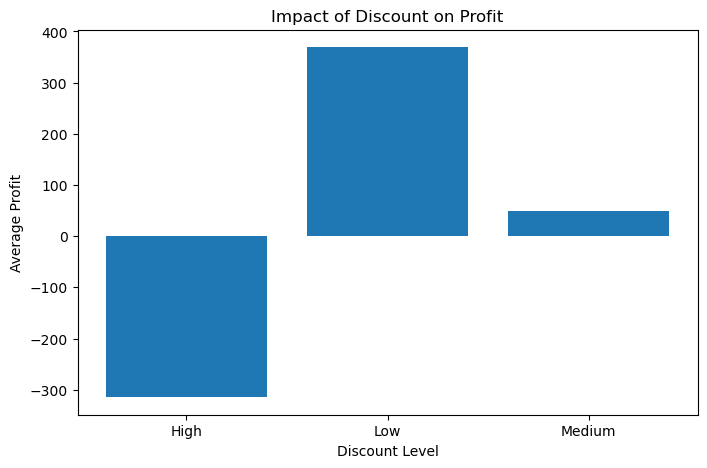

In [16]:
plt.figure(figsize=(8,5))
plt.bar(profit_summary['Discount_Level'], profit_summary['Profit'])
plt.title("Impact of Discount on Profit")
plt.xlabel("Discount Level")
plt.ylabel("Average Profit")
plt.show()

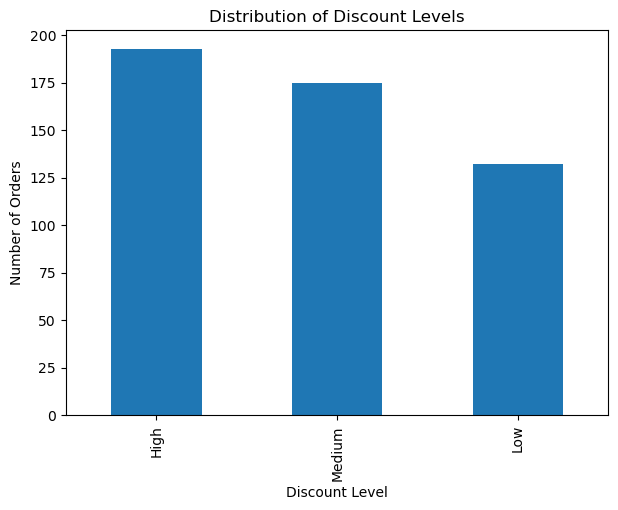

In [17]:
plt.figure(figsize=(7,5))
df['Discount_Level'].value_counts().plot(kind='bar')
plt.title("Distribution of Discount Levels")
plt.xlabel("Discount Level")
plt.ylabel("Number of Orders")
plt.show()

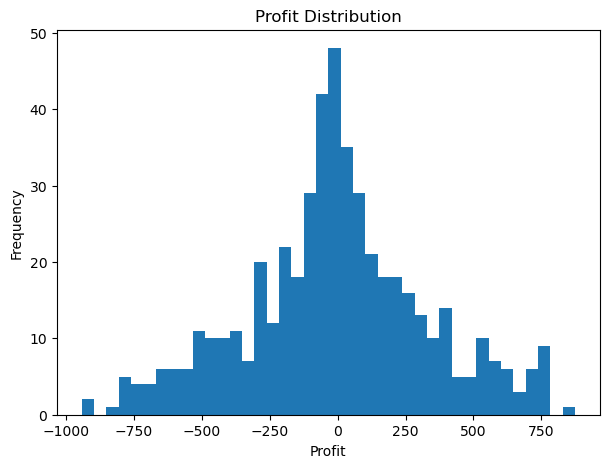

In [18]:
plt.figure(figsize=(7,5))
plt.hist(df['Profit'], bins=40)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

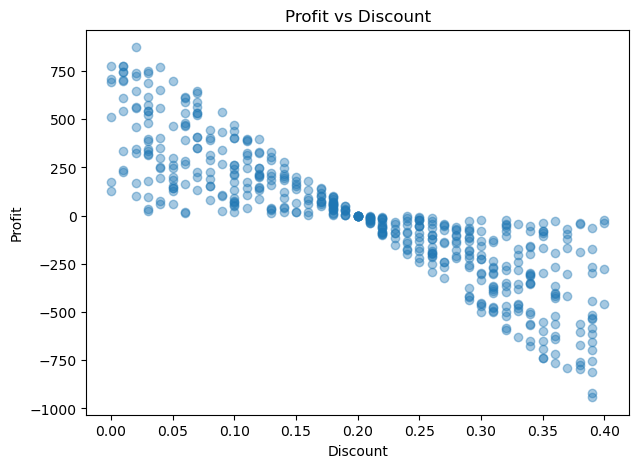

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(df['Discount'], df['Profit'], alpha=0.4)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

<Figure size 800x500 with 0 Axes>

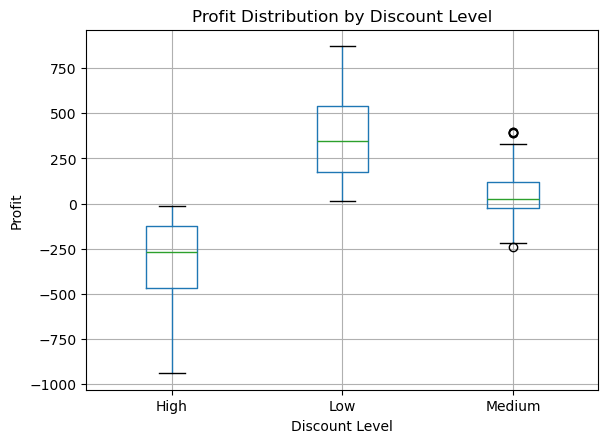

In [20]:
plt.figure(figsize=(8,5))
df.boxplot(column='Profit', by='Discount_Level')
plt.title("Profit Distribution by Discount Level")
plt.suptitle("")
plt.xlabel("Discount Level")
plt.ylabel("Profit")
plt.show()

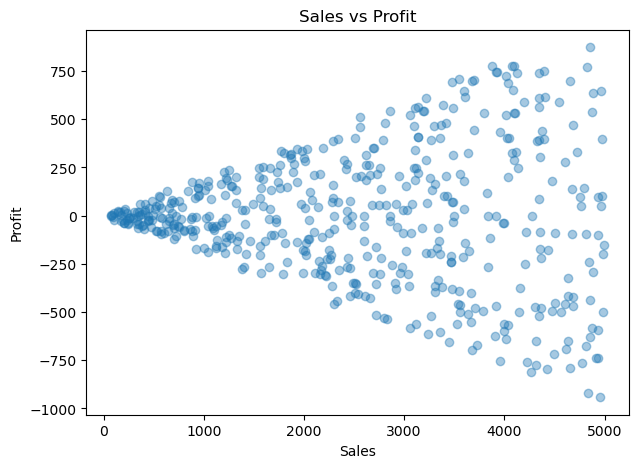

In [21]:
plt.figure(figsize=(7,5))
plt.scatter(df['Sales'], df['Profit'], alpha=0.4)
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

In [22]:
kpi = df.groupby('Discount_Level').agg(
    Avg_Sales=('Sales', 'mean'),
    Avg_Profit=('Profit', 'mean'),
    Order_Count=('Profit', 'count')
).reset_index()

kpi

,Discount_Level,Avg_Sales,Avg_Profit,Order_Count
0,High,2506.585285,-314.653109,193
1,Low,2474.076212,369.245833,132
2,Medium,2499.035657,49.199714,175


# Conclusion : Higher discount levels significantly reduce profitability,with high discounts leading to consistent losses despite stable sales volume.